# Task

The task is to write a function that finds pairs of integers from a list that sum to a given value. The function will take as input the list of numbers as well as the target sum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import random

In [2]:
'''
Funcion que encuentra pares de numeros enteros de una lista que suman un valor objetivo
'''
def encontrarParejas1(l, target):
    parejas = []
    for i in range(len(l)):
        for j in range(i+1, len(l)):
            if l[i] + l[j] == target:
                parejas.append((l[i], l[j]))
    return parejas

In [5]:
# Prueba 1 de la funcion
l = [1,9,5,0,20,-4,12,16,7]
target = 12
print(encontrarParejas1(l,target))

[(5, 7), (0, 12), (-4, 16)]


La funcion ```encontrarParejas(l, target)``` claramente tiene una complejidad cuadratica por contener un bucle anidado. Una forma de establecer que la complejidad es ```O(n^2)``` es graficando los tiempos de ejecucion a medida que el tamano de la lista crece.

In [16]:
# Funcion para crear una lista de numeros naturales random
def crearLista(n):
    lista = []
    for i in range(n):
        lista.append(random.randint(1,2*n))
    return lista

# Funcion para graficar
def graficar(x, y , n ):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y)
    plt.title(f'Busqueda en lista - {n}')
    plt.xlabel('Tamaño de la lista')
    plt.ylabel('Tiempo de ejecucion')
    plt.grid()
    plt.show()

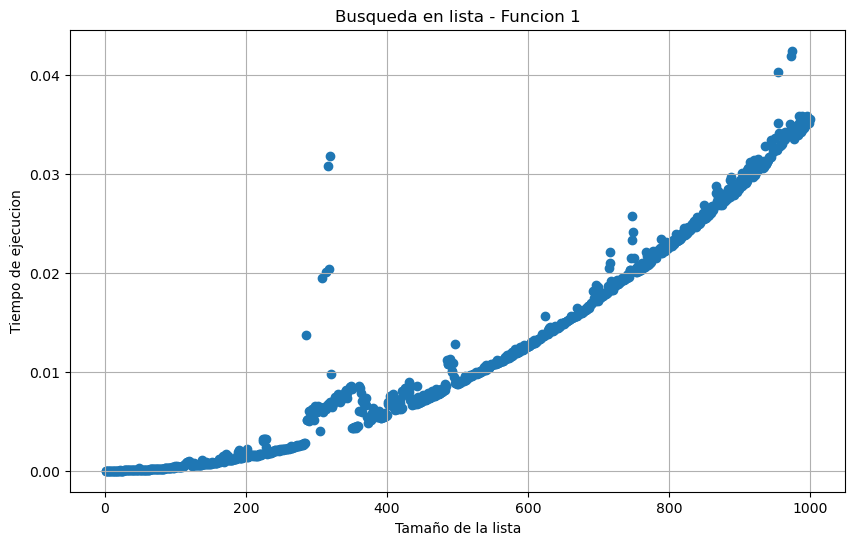

In [17]:
# Grafica para la funcion 1
tiempos1 = []
for i in range(1,1000+1):
    lista = crearLista(i)
    target = 0 # Tomamos el cero por ser un valor no encontrado en la lista -> Peor de los casos
    inicio = time.time()
    encontrarParejas1(lista, target)
    fin = time.time()
    tiempos1.append(fin-inicio)
graficar(range(1,1000+1), tiempos1, 'Funcion 1')

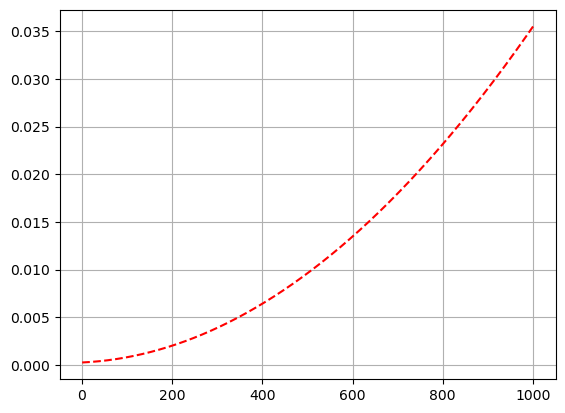

In [18]:
# Podemos ajustar la curva usando polyfit
def ajuste(x, y):
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    plt.plot(x, p(x), 'r--')
    plt.grid()
    plt.show()

ajuste(range(1,1000+1), tiempos1)

Como mejoramos la eficiencia del algoritmo?

**Propuesta: Busqueda Binaria**

Para eliminar uno de los bucles ```for``` utilizamos busqueda binaria siempre y cuando la lista entregada este ordenada ascendentemente.

In [19]:
# Algoritmo de busqueda binaria

def busquedaBinaria(lista, elemento):
    inicio = 0
    final = len(lista) - 1
    while inicio <= final:
        mitad = (inicio + final) // 2
        if lista[mitad] == elemento:
            return mitad
        elif lista[mitad] < elemento:
            inicio = mitad + 1
        else:
            final = mitad - 1
    return -1

In [20]:
# Algoritmo para ordenar una lista

def quicksort(lista):
    if len(lista) <= 1:
        return lista
    else:
        pivote = lista[0]
        menores = [i for i in lista[1:] if i <= pivote]
        mayores = [i for i in lista[1:] if i > pivote]

    return quicksort(menores) + [pivote] + quicksort(mayores)

In [21]:
# Funcion propuesta

def encontrarParejas2(l, target):
    parejas = []
    l = quicksort(l)
    for i in range(len(l)-1):
        j = busquedaBinaria(l[i+1:],target-l[i])
        if j != -1:
            parejas.append((l[i], target-l[i]))
    return parejas

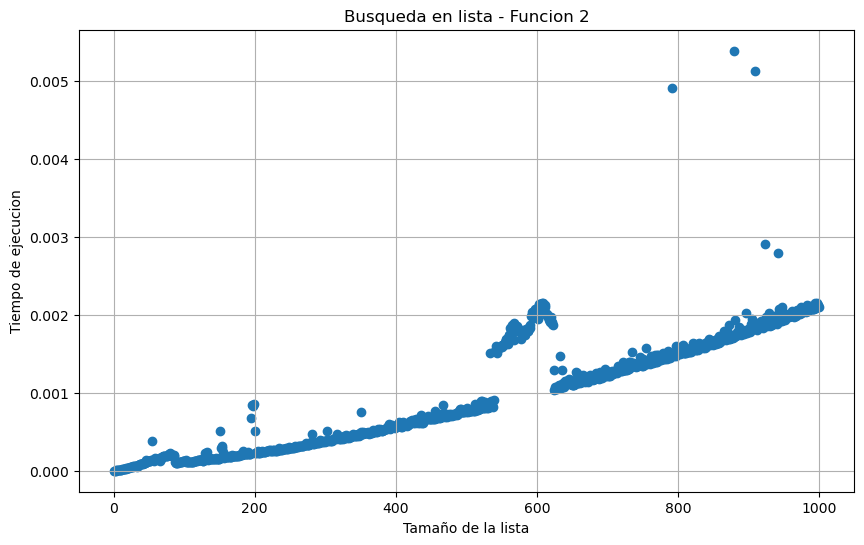

In [24]:
# Grafica para la funcion 2
tiempos2 = []
for i in range(1,1000+1):
    lista = crearLista(i)
    target = 0 # Tomamos el cero por ser un valor no encontrado en la lista -> Peor de los casos
    inicio = time.time()
    encontrarParejas2(lista, target)
    fin = time.time()
    tiempos2.append(fin-inicio)
graficar(range(1,1000+1), tiempos2, 'Funcion 2')

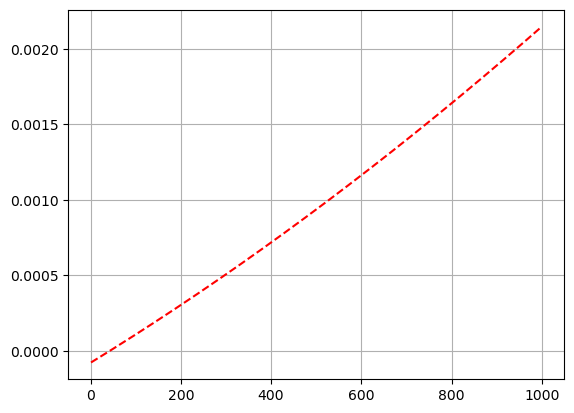

In [25]:
# Podemos ajustar la curva usando polyfit
def ajuste(x, y):
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    plt.plot(x, p(x), 'r--')
    plt.grid()
    plt.show()

ajuste(range(1,1000+1), tiempos2)

Realizamos una modificacion del quicksort por la funcion implementada en python ```sorted()```


In [26]:
def encontrarParejas3(l, target):
    parejas = []
    l = sorted(l)
    for i in range(len(l)-1):
        j = busquedaBinaria(l[i+1:],target-l[i])
        if j != -1:
            parejas.append((l[i], target-l[i]))
    return parejas

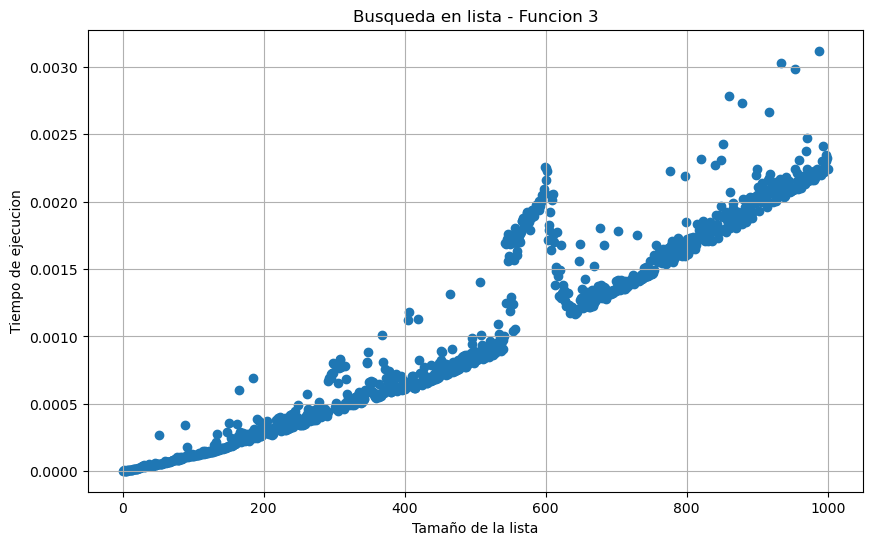

In [27]:
# Grafica para la funcion 3
tiempos3 = []
for i in range(1,1000+1):
    lista = crearLista(i)
    target = 0 # Tomamos el cero por ser un valor no encontrado en la lista -> Peor de los casos
    inicio = time.time()
    encontrarParejas3(lista, target)
    fin = time.time()
    tiempos3.append(fin-inicio)
graficar(range(1,1000+1), tiempos3, 'Funcion 3')

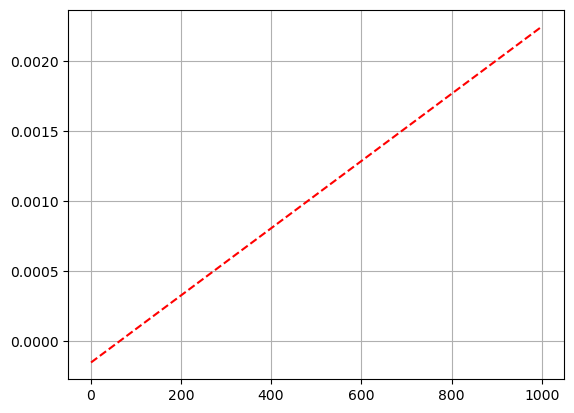

In [32]:
# Podemos ajustar la curva usando polyfit
def ajuste(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), 'r--')
    plt.grid()
    plt.show()

ajuste(range(1,1000+1), tiempos3)

In [35]:
def encontrarParejas4(lista, suma):
    # creamos un diccionario para guardar los numeros que ya hemos visto
    parejas = []
    numeros_vistos = {}
    # recorremos la lista
    for numero in lista:
        # calculamos el numero que falta para llegar a la suma
        numero_faltante = suma - numero
        # si el numero faltante esta en el diccionario, devolvemos la pareja
        if numero_faltante in numeros_vistos:
            parejas.append((numero, numero_faltante))
            #return (numero, numero_faltante)
        # si no esta en el diccionario, lo añadimos
        else:
            numeros_vistos[numero] = True
    # si no hemos encontrado la pareja, devolvemos None
    return parejas

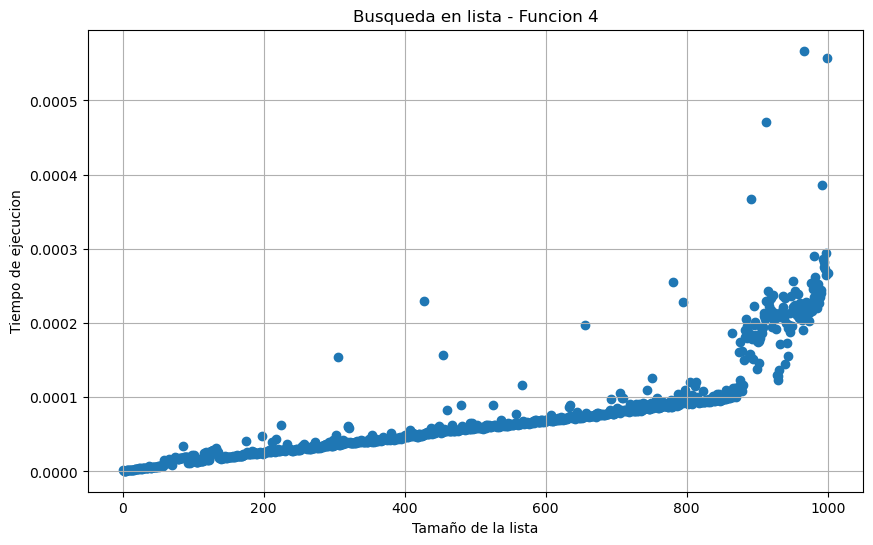

In [36]:
# Grafica para la funcion 4
tiempos4 = []
for i in range(1,1000+1):
    lista = crearLista(i)
    target = 0 # Tomamos el cero por ser un valor no encontrado en la lista -> Peor de los casos
    inicio = time.time()
    encontrarParejas4(lista, target)
    fin = time.time()
    tiempos4.append(fin-inicio)
graficar(range(1,1000+1), tiempos4, 'Funcion 4')

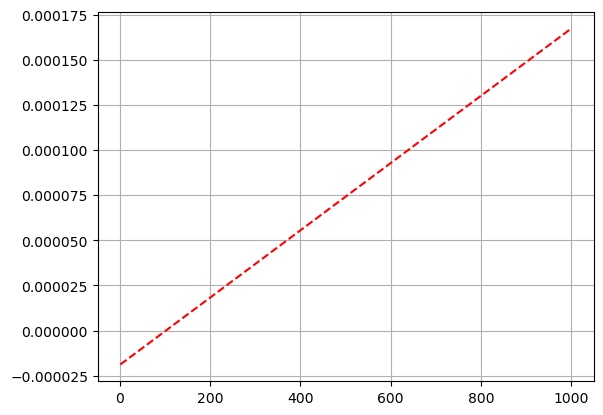

In [37]:
# Podemos ajustar la curva usando polyfit
def ajuste(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), 'r--')
    plt.grid()
    plt.show()

ajuste(range(1,1000+1), tiempos4)